# Assigment 2 Overview
In this assignment, we are asked to train a few decision tree classifiers on the Breast cancer wisconsin (diagnostic) dataset available on Scikit-Learn and compare their performances.

# Get the Data

In [172]:
from sklearn.datasets import load_breast_cancer
data, target = load_breast_cancer(return_X_y=True, as_frame=True)
# class 0: malignant
# class 1: benign

In [173]:
data

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


# Data Preprocessing

## D1

In [174]:
data = data.reindex(sorted(data.columns), axis=1)  # type: ignore

In [175]:
data

,area error,compactness error,concave points error,concavity error,fractal dimension error,mean area,mean compactness,mean concave points,mean concavity,mean fractal dimension,...,worst area,worst compactness,worst concave points,worst concavity,worst fractal dimension,worst perimeter,worst radius,worst smoothness,worst symmetry,worst texture
0,153.40,0.04904,0.01587,0.05373,0.006193,1001.0,0.27760,0.14710,0.30010,0.07871,...,2019.0,0.66560,0.2654,0.7119,0.11890,184.60,25.380,0.16220,0.4601,17.33
1,74.08,0.01308,0.01340,0.01860,0.003532,1326.0,0.07864,0.07017,0.08690,0.05667,...,1956.0,0.18660,0.1860,0.2416,0.08902,158.80,24.990,0.12380,0.2750,23.41
2,94.03,0.04006,0.02058,0.03832,0.004571,1203.0,0.15990,0.12790,0.19740,0.05999,...,1709.0,0.42450,0.2430,0.4504,0.08758,152.50,23.570,0.14440,0.3613,25.53
3,27.23,0.07458,0.01867,0.05661,0.009208,386.1,0.28390,0.10520,0.24140,0.09744,...,567.7,0.86630,0.2575,0.6869,0.17300,98.87,14.910,0.20980,0.6638,26.50
4,94.44,0.02461,0.01885,0.05688,0.005115,1297.0,0.13280,0.10430,0.19800,0.05883,...,1575.0,0.20500,0.1625,0.4000,0.07678,152.20,22.540,0.13740,0.2364,16.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,158.70,0.02891,0.02454,0.05198,0.004239,1479.0,0.11590,0.13890,0.24390,0.05623,...,2027.0,0.21130,0.2216,0.4107,0.07115,166.10,25.450,0.14100,0.2060,26.40
565,99.04,0.02423,0.01678,0.03950,0.002498,1261.0,0.10340,0.09791,0.14400,0.05533,...,1731.0,0.19220,0.1628,0.3215,0.06637,155.00,23.690,0.11660,0.2572,38.25
566,48.55,0.03731,0.01557,0.04730,0.003892,858.1,0.10230,0.05302,0.09251,0.05648,...,1124.0,0.30940,0.1418,0.3403,0.07820,126.70,18.980,0.11390,0.2218,34.12
567,86.22,0.06158,0.01664,0.07117,0.006185,1265.0,0.27700,0.15200,0.35140,0.07016,...,1821.0,0.86810,0.2650,0.9387,0.12400,184.60,25.740,0.16500,0.4087,39.42


In [176]:
# Configure save image
# Reference: https://github.com/ageron/handson-ml3/blob/main/03_classification.ipynb
from pathlib import Path
import matplotlib.pyplot as plt

IMAGES_PATH = Path() / "images"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)


def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300, bbox_inches='tight', pad_inches=0.3, ** kwargs):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution,
                bbox_inches=bbox_inches, pad_inches=pad_inches, **kwargs)

In [177]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<Figure size 2050x2000 with 0 Axes>

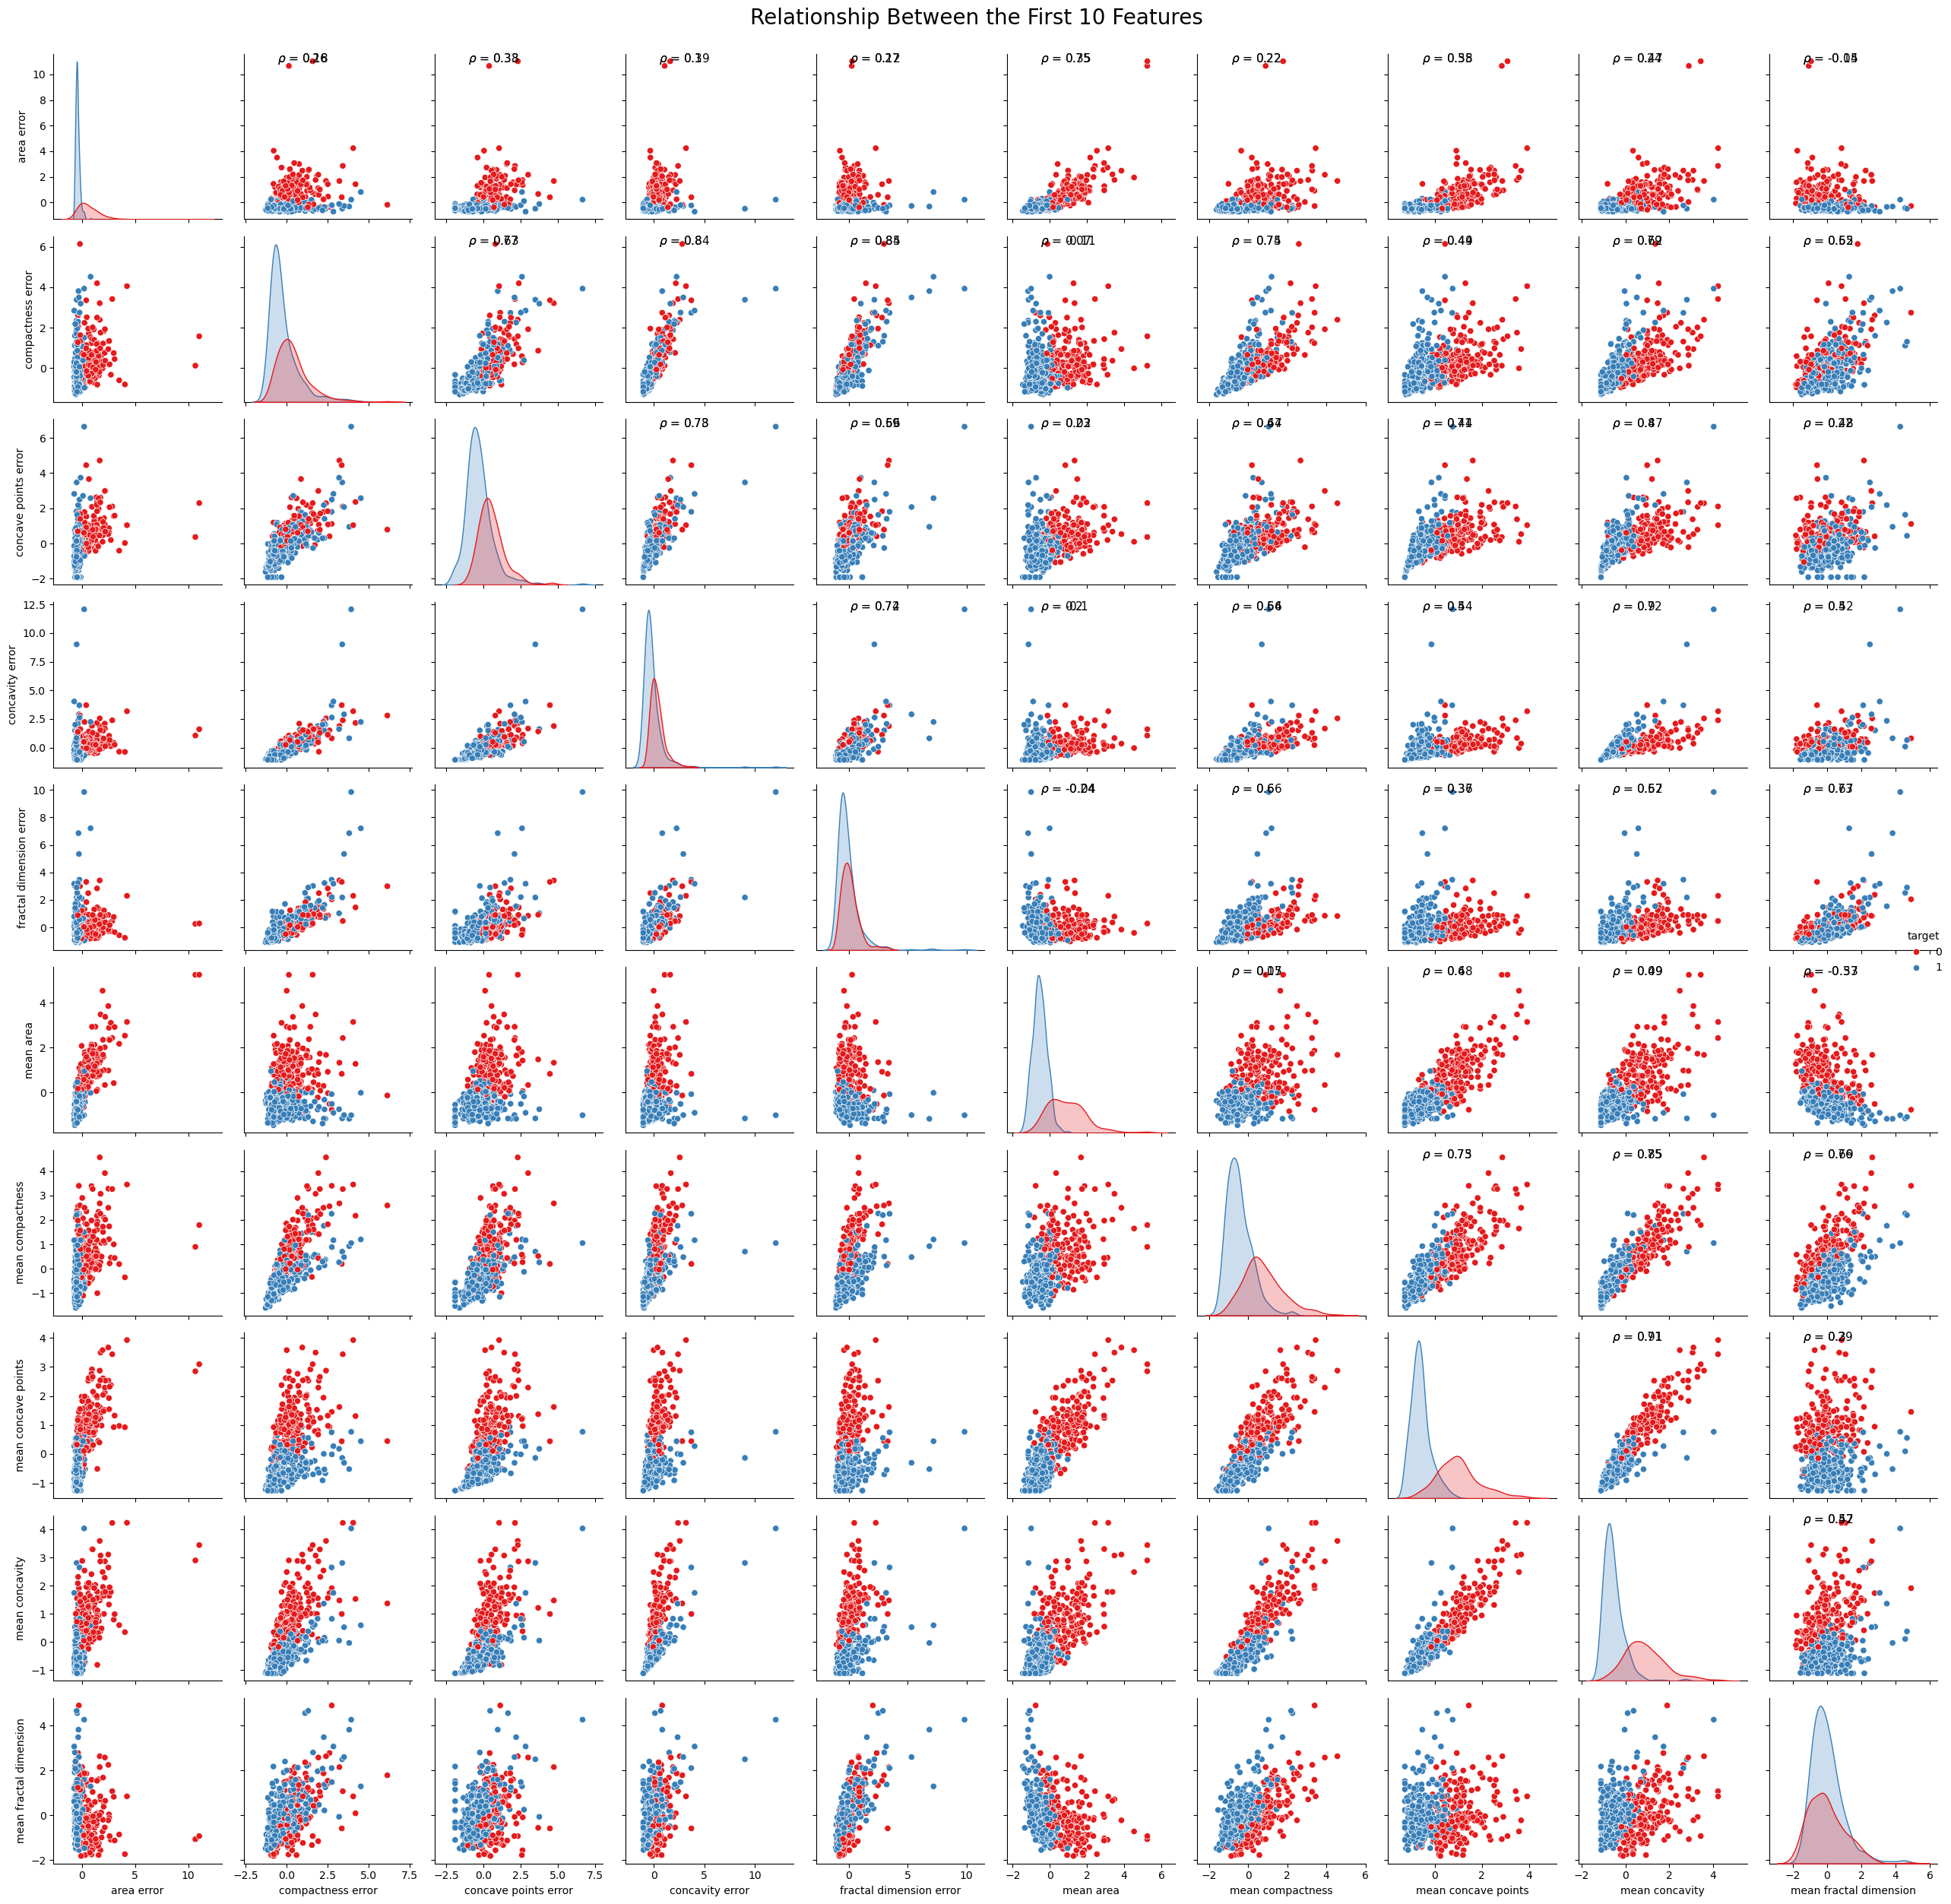

In [178]:
# Reference: https://medium.com/@tutorialcreation81/exploratory-data-analysis-of-breast-cancer-dataset-8c4cd7712f6f
# https://indianaiproduction.com/seaborn-pairplot/
# https://towardsdatascience.com/visualizing-data-with-pair-plots-in-python-f228cf529166

# Function to calculate correlation coefficient between two arrays
def corr(x, y, **kwargs):

    # Calculate the value
    coef = np.corrcoef(x, y)[0][1]
    # Make the label
    label = r'$\rho$ = ' + str(round(coef, 2))

    # Add the label to the plot
    ax = plt.gca()
    ax.annotate(label, xy=(0.2, 0.95), size=11, xycoords=ax.transAxes)


def pair_plot_features(y: pd.DataFrame, X: pd.DataFrame, start: int, stop: int):
    """
    perform pair plot on set of variables

    args:
        y (pd.DataFrame): dataframe of dependent variable
        X (pd.DataFrame): dataframe of independent variable
        start (int): where to start in independent variables
        stop (int): where to stop in independent variables

    returns:
        pair plots of set of features from start to stop
    """
    data = X
    data_n_2 = (data - data.mean()) / (data.std())  # standardization
    data = pd.concat([y, data_n_2.iloc[:, start:stop]], axis=1)
    plt.figure(figsize=(20.5, 20))
    grid = sns.pairplot(data=data, kind="scatter",
                        hue="target", palette="Set1")
    grid = grid.map_upper(corr)
    grid.figure.suptitle(
        'Relationship Between the First 10 Features', y=1, fontsize=20)


pair_plot_features(target.to_frame(), data.iloc[:, :10], 0, 10)  # type: ignore
save_fig('d1')

## D3

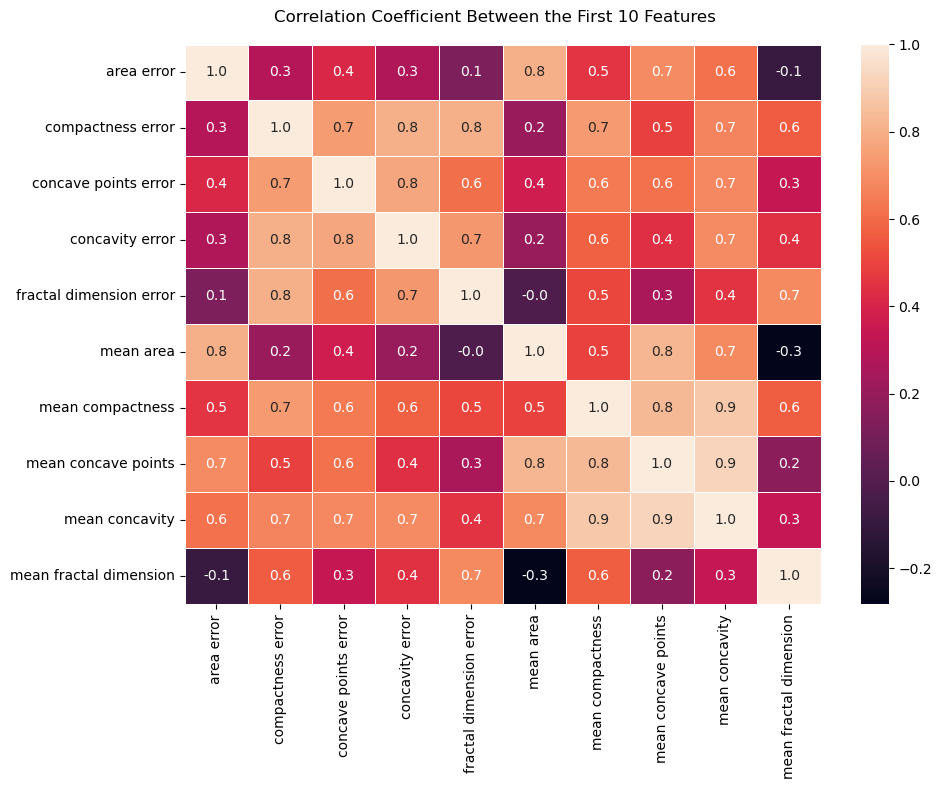

In [179]:
# https://courses.engr.illinois.edu/cs357/fa2019/assets/demos/upload/CA10-ML/Breast-cancer-data.html

# correlation matrix
def plot_correlation_heatmap(X: pd.DataFrame):
    """
    plot correlations of the different variables

    args:
        X (pd.DataFrame): a dataframe of the independent variables

    returns:
        a heatmap of the correlation
    """
    corrmat = X.corr()
    fig, ax = plt.subplots(figsize=(10, 8))
    plt.suptitle('Correlation Coefficient Between the First 10 Features')
    sns.heatmap(corrmat, annot=True, linewidths=.5, fmt='.1f', ax=ax)
    # plt.xticks(rotation=45)


plot_correlation_heatmap(data.iloc[:, :10])
save_fig('d3')

## D5

In [180]:
columns_to_drop = ['mean perimeter', 'mean radius',
                   'worst radius', 'worst perimeter', 'radius error']
data = data.drop(columns_to_drop, axis=1)

In [181]:
data

,area error,compactness error,concave points error,concavity error,fractal dimension error,mean area,mean compactness,mean concave points,mean concavity,mean fractal dimension,...,symmetry error,texture error,worst area,worst compactness,worst concave points,worst concavity,worst fractal dimension,worst smoothness,worst symmetry,worst texture
0,153.40,0.04904,0.01587,0.05373,0.006193,1001.0,0.27760,0.14710,0.30010,0.07871,...,0.03003,0.9053,2019.0,0.66560,0.2654,0.7119,0.11890,0.16220,0.4601,17.33
1,74.08,0.01308,0.01340,0.01860,0.003532,1326.0,0.07864,0.07017,0.08690,0.05667,...,0.01389,0.7339,1956.0,0.18660,0.1860,0.2416,0.08902,0.12380,0.2750,23.41
2,94.03,0.04006,0.02058,0.03832,0.004571,1203.0,0.15990,0.12790,0.19740,0.05999,...,0.02250,0.7869,1709.0,0.42450,0.2430,0.4504,0.08758,0.14440,0.3613,25.53
3,27.23,0.07458,0.01867,0.05661,0.009208,386.1,0.28390,0.10520,0.24140,0.09744,...,0.05963,1.1560,567.7,0.86630,0.2575,0.6869,0.17300,0.20980,0.6638,26.50
4,94.44,0.02461,0.01885,0.05688,0.005115,1297.0,0.13280,0.10430,0.19800,0.05883,...,0.01756,0.7813,1575.0,0.20500,0.1625,0.4000,0.07678,0.13740,0.2364,16.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,158.70,0.02891,0.02454,0.05198,0.004239,1479.0,0.11590,0.13890,0.24390,0.05623,...,0.01114,1.2560,2027.0,0.21130,0.2216,0.4107,0.07115,0.14100,0.2060,26.40
565,99.04,0.02423,0.01678,0.03950,0.002498,1261.0,0.10340,0.09791,0.14400,0.05533,...,0.01898,2.4630,1731.0,0.19220,0.1628,0.3215,0.06637,0.11660,0.2572,38.25
566,48.55,0.03731,0.01557,0.04730,0.003892,858.1,0.10230,0.05302,0.09251,0.05648,...,0.01318,1.0750,1124.0,0.30940,0.1418,0.3403,0.07820,0.11390,0.2218,34.12
567,86.22,0.06158,0.01664,0.07117,0.006185,1265.0,0.27700,0.15200,0.35140,0.07016,...,0.02324,1.5950,1821.0,0.86810,0.2650,0.9387,0.12400,0.16500,0.4087,39.42


# Fitting a Decision Tree Model with Default Hyperparameters

## Split the Data

In [182]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    data, target, test_size=0.2, random_state=5508)

## D6

In [210]:
from sklearn.metrics import ConfusionMatrixDisplay


def plot_cm_and_table(figure_title, figure_name, confusion_matrix, table_content, row_labels, col_labels):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
    ax1.axis('off')
    ax1.axis('tight')
    ax1.margins(x=0, y=0)
    table = ax1.table(cellText=table_content, rowLabels=row_labels,
                      colLabels=col_labels, loc='center', cellLoc='center')
    # Adjust font size
    table.auto_set_font_size(False)
    table.set_fontsize(13)
    # Adjust cell heights and widths
    table.scale(1, 6)

    disp = ConfusionMatrixDisplay(
        confusion_matrix=confusion_matrix, display_labels=[0, 1])
    disp.plot(ax=ax2, cmap='Blues')
    ax2.set_title('Confusion Matrix (Test Set)')

    fig.suptitle(figure_title, fontsize='xx-large')
    save_fig(figure_name, tight_layout=True,
             bbox_inches='tight', pad_inches=0.05)
    plt.show()

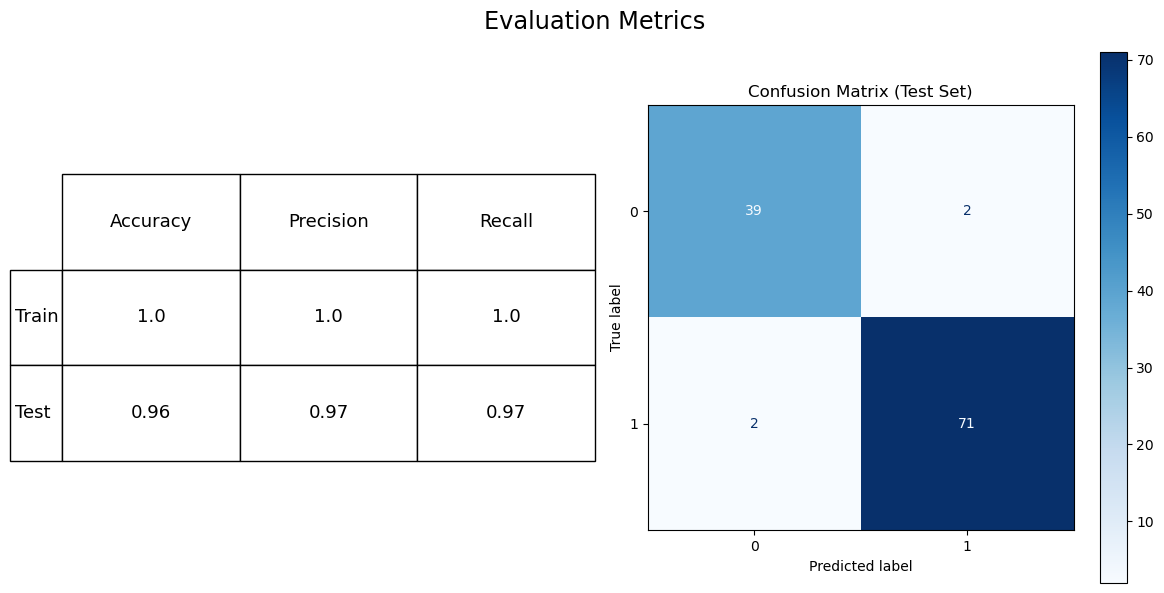

In [184]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score, recall_score, accuracy_score, confusion_matrix

tree_clf = DecisionTreeClassifier(random_state=5508)
tree_clf.fit(X_train, y_train)


def dt_evaluate(model, X, y, get_cm=False):
    pred = model.predict(X)
    accuracy = round(accuracy_score(y, pred), 2)
    precision = round(precision_score(y, pred), 2)  # type: ignore
    recall = round(recall_score(y, pred), 2)  # type: ignore
    if get_cm:
        cm = confusion_matrix(y, pred)
        return accuracy, precision, recall, cm

    return accuracy, precision, recall


train_accuracy, train_precision, train_recall = dt_evaluate(  # type: ignore
    tree_clf, X_train, y_train)
test_accuracy, test_precision, test_recall, test_cm = dt_evaluate(  # type: ignore
    tree_clf, X_test, y_test, get_cm=True)

rows = ['Train', 'Test']
columns = ['Accuracy', 'Precision', 'Recall']
cell_text = [[train_accuracy, train_precision, train_recall],
             [test_accuracy, test_precision, test_recall]]
plot_cm_and_table('Evaluation Metrics', 'd6',
                  test_cm, cell_text, rows, columns)

## D8

In [185]:
from sklearn.tree import export_graphviz

export_graphviz(
    tree_clf,
    out_file=str(IMAGES_PATH / "cancer_tree.dot"),  # path differs in the book
    feature_names=X_train.columns,
    class_names=['Malignant', 'Benign'],
    rounded=True,
    filled=True
)

!dot -Tpng {IMAGES_PATH / "cancer_tree.dot"} -o {IMAGES_PATH / "d8_cancer_tree.png"}

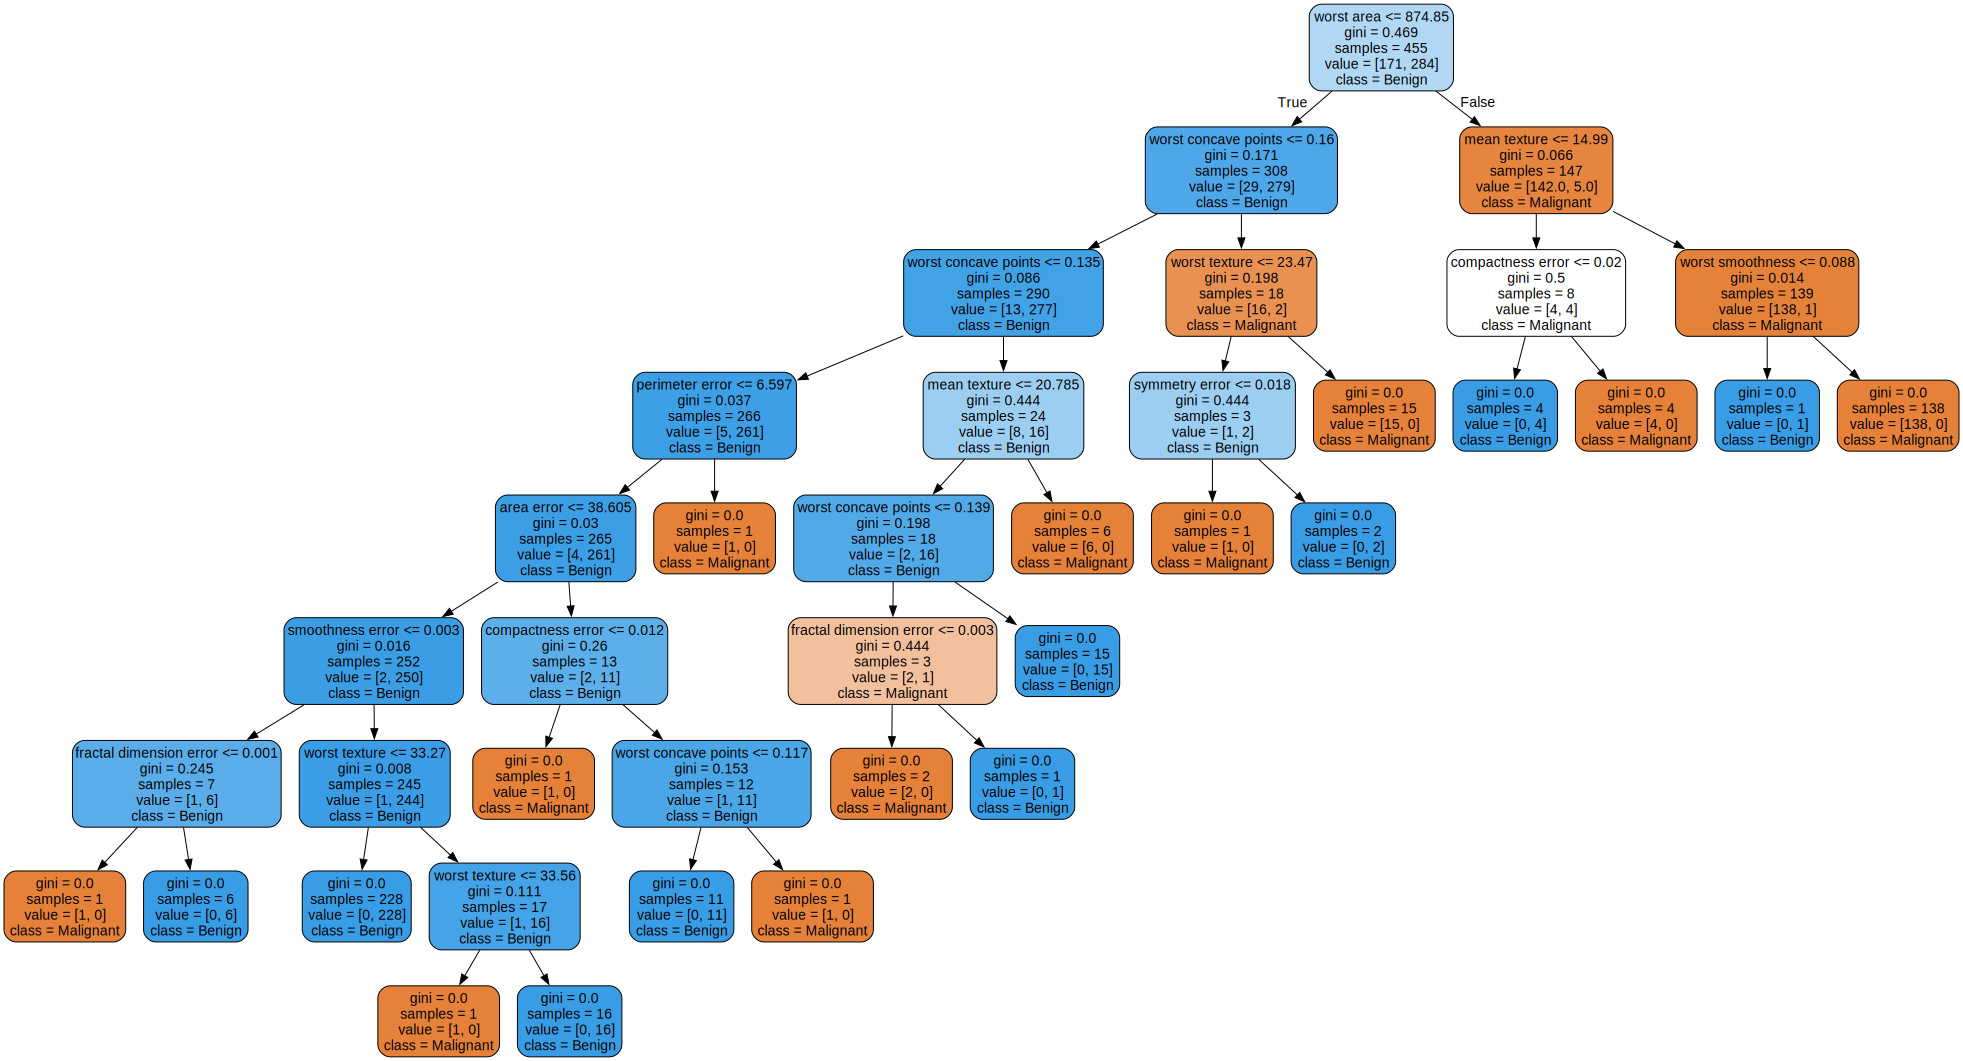

In [186]:
from graphviz import Source

Source.from_file(IMAGES_PATH / "cancer_tree.dot")

## D10

In [187]:
def split_train_evaluate(seed, split_size=0.2):
    X_train, X_test, y_train, y_test = train_test_split(
        data, target, test_size=split_size, random_state=seed)
    tree_clf = DecisionTreeClassifier(random_state=5508)
    tree_clf.fit(X_train, y_train)
    test_accuracy, test_precision, test_recall = dt_evaluate(  # type: ignore
        tree_clf, X_test, y_test)
    return test_accuracy, test_precision, test_recall


test_accuracy1, test_precision1, test_recall1 = split_train_evaluate(5509)
test_accuracy2, test_precision2, test_recall2 = split_train_evaluate(5510)
test_accuracy3, test_precision3, test_recall3 = split_train_evaluate(5511)
test_accuracy4, test_precision4, test_recall4 = split_train_evaluate(5512)

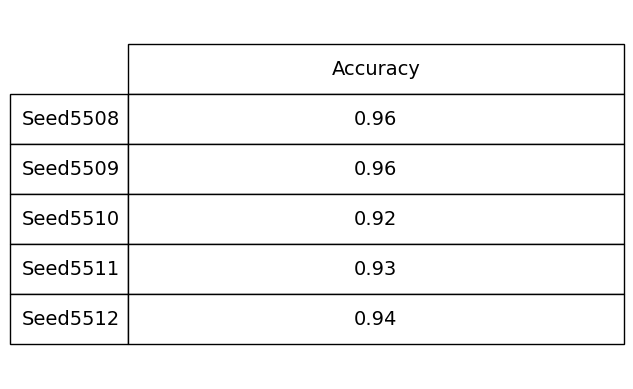

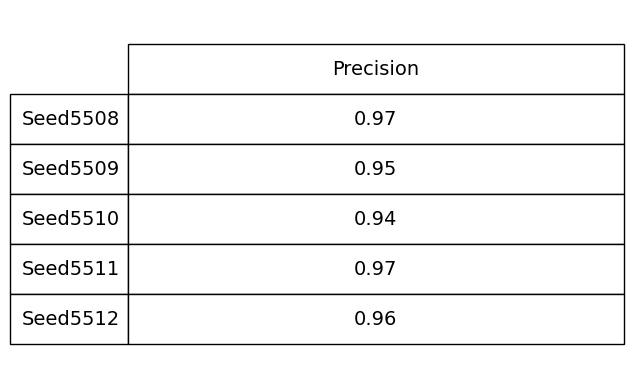

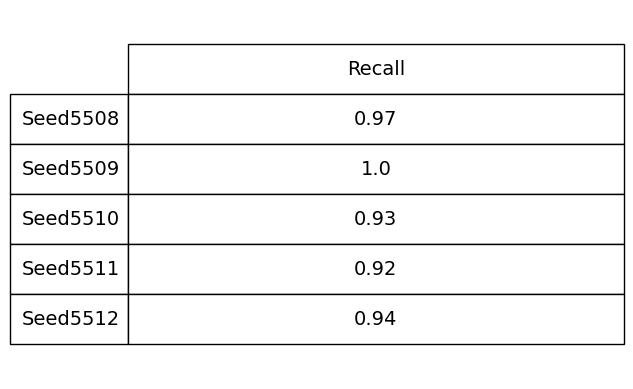

In [188]:
def plot_table(fig_name, table_content, row_lables, col_labels):
    fig, ax = plt.subplots()
    # hide axes
    fig.patch.set_visible(False)
    ax.axis('off')
    ax.axis('tight')
    ax.margins(x=0, y=0)
    table = ax.table(cellText=table_content, rowLabels=row_lables,
                     colLabels=col_labels, loc='center', cellLoc='center')
    # Adjust font size
    table.auto_set_font_size(False)
    table.set_fontsize(14)
    # Adjust cell heights and widths
    table.scale(1, 3)
    save_fig(fig_name, tight_layout=False, bbox_inches='tight', pad_inches=0.1)
    plt.show()


accuracies = [[test_accuracy], [test_accuracy1], [test_accuracy2],
              [test_accuracy3], [test_accuracy4]]
precisions = [[test_precision], [test_precision1], [test_precision2],
              [test_precision3], [test_precision4]]
recalls = [[test_recall], [test_recall1], [
    test_recall2], [test_recall3], [test_recall4]]


row_labels = ['Seed5508', 'Seed5509', 'Seed5510', 'Seed5511', 'Seed5512']
plot_table('d10_accuracy', accuracies, row_labels, ['Accuracy'])
plot_table('d10_precision', precisions, row_labels, ['Precision'])
plot_table('d10_recall', recalls, row_labels, ['Recall'])

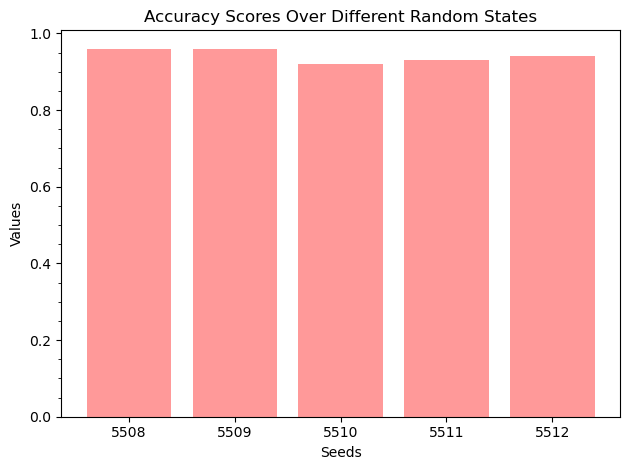

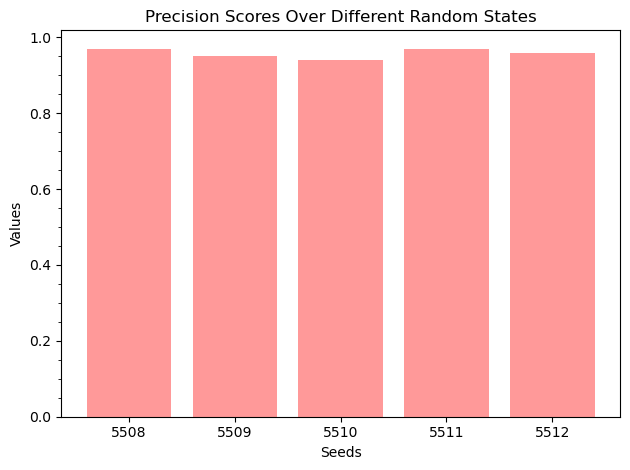

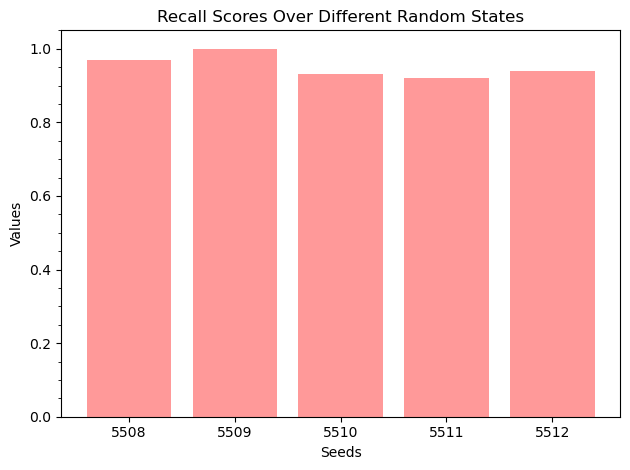

In [189]:
# https://www.tutorialspoint.com/matplotlib/matplotlib_bar_plot.htm
from matplotlib.ticker import AutoMinorLocator


def plot_barchart(fig_name, fig_title, categories, values):
    fig, ax = plt.subplots()
    plt.bar(categories, values, color='red', alpha=0.4)
    plt.xlabel('Seeds')
    plt.ylabel('Values')
    plt.title(fig_title)
    ax.yaxis.set_minor_locator(AutoMinorLocator())
    save_fig(fig_name)
    plt.show()


accuracies = [test_accuracy, test_accuracy1, test_accuracy2,
              test_accuracy3, test_accuracy4]
precisions = [test_precision, test_precision1, test_precision2,
              test_precision3, test_precision4]
recalls = [test_recall, test_recall1, test_recall2, test_recall3, test_recall4]

categories = ['5508', '5509', '5510', '5511', '5512']
plot_barchart('d10_accuracy',
              'Accuracy Scores Over Different Random States', categories, accuracies)
plot_barchart('d10_precision',
              'Precision Scores Over Different Random States', categories, precisions)
plot_barchart('d10_recall',
              'Recall Scores Over Different Random States', categories, recalls)

## D11

In [190]:
test_accuracy5, test_precision5, test_recall5 = split_train_evaluate(5508, 0.5)
test_accuracy6, test_precision6, test_recall6 = split_train_evaluate(5508, 0.4)
test_accuracy7, test_precision7, test_recall7 = split_train_evaluate(5508, 0.3)
test_accuracy8, test_precision8, test_recall8 = split_train_evaluate(5508, 0.2)
test_accuracy9, test_precision9, test_recall9 = split_train_evaluate(5508, 0.1)

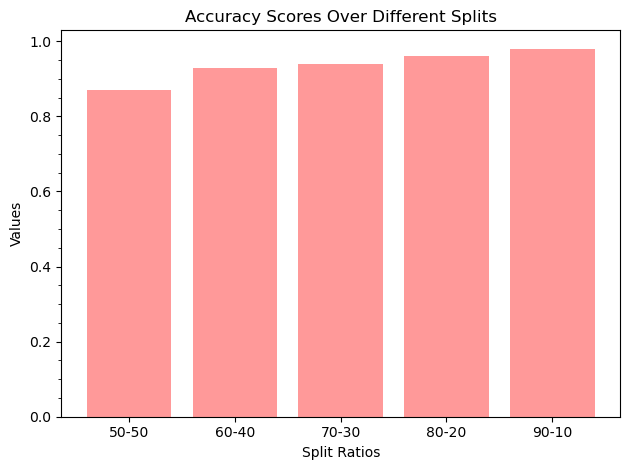

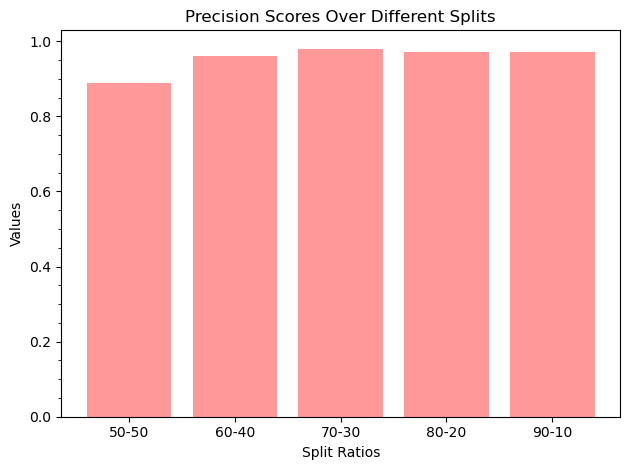

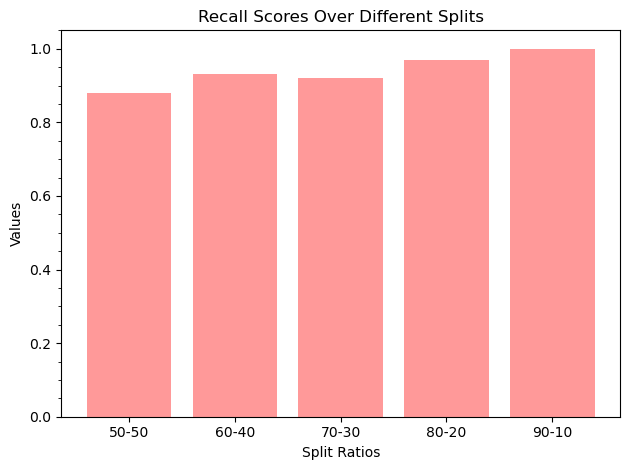

In [191]:
# https://www.tutorialspoint.com/matplotlib/matplotlib_bar_plot.htm
from matplotlib.ticker import AutoMinorLocator


def plot_barchart(fig_name, fig_title, categories, values):
    fig, ax = plt.subplots()
    plt.bar(categories, values, color='red', alpha=0.4)
    plt.xlabel('Split Ratios')
    plt.ylabel('Values')
    plt.title(fig_title)
    ax.yaxis.set_minor_locator(AutoMinorLocator())
    save_fig(fig_name)
    plt.show()


accuracies = [test_accuracy5, test_accuracy6, test_accuracy7,
              test_accuracy8, test_accuracy9]
precisions = [test_precision5, test_precision6, test_precision7,
              test_precision8, test_precision9]
recalls = [test_recall5, test_recall6,
           test_recall7, test_recall8, test_recall9]

categories = ['50-50', '60-40',
              '70-30', '80-20', '90-10']
plot_barchart('d11_accuracy',
              'Accuracy Scores Over Different Splits', categories, accuracies)
plot_barchart('d11_precision',
              'Precision Scores Over Different Splits', categories, precisions)
plot_barchart('d11_recall',
              'Recall Scores Over Different Splits', categories, recalls)

## D12

Fitting 10 folds for each of 32 candidates, totalling 320 fits
When scoring='accuracy', the optimal hyperparameters:  {'max_depth': 2, 'min_samples_leaf': 5, 'min_samples_split': 2}


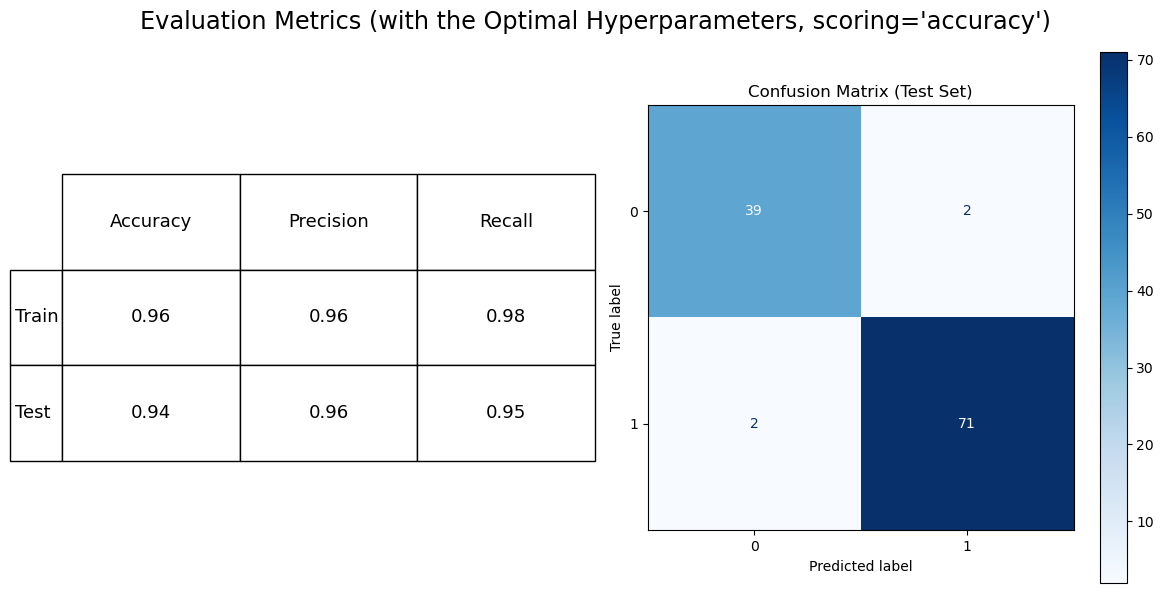

In [192]:
from sklearn.model_selection import GridSearchCV

params = [{'max_depth': [2, 3, 4, 5],
           'min_samples_split': [2, 4, 5, 10],
           'min_samples_leaf': [2, 5]
           }]

tree_clf = DecisionTreeClassifier(random_state=5508)
gs_clf1 = GridSearchCV(tree_clf, params, cv=10,
                       scoring='accuracy', n_jobs=-1, verbose=1)
gs_clf1.fit(X_train, y_train)
print("When scoring='accuracy', the optimal hyperparameters: ", gs_clf1.best_params_)

train_accuracy, train_precision, train_recall = dt_evaluate(  # type: ignore
    gs_clf1, X_train, y_train)
test_accuracy, test_precision, test_recall, test_cm1 = dt_evaluate(  # type: ignore
    gs_clf1, X_test, y_test, get_cm=True)

rows = ['Train', 'Test']
columns = ['Accuracy', 'Precision', 'Recall']
cell_text_fine_tuned = [[train_accuracy, train_precision, train_recall],
                        [test_accuracy, test_precision, test_recall]]
plot_cm_and_table("Evaluation Metrics (with the Optimal Hyperparameters, scoring='accuracy')", 'd12',
                  test_cm, cell_text_fine_tuned, rows, columns)

## D14

In [193]:
print("When scoring='accuracy', the optimal hyperparameters: ", gs_clf1.best_params_)

gs_clf2 = GridSearchCV(tree_clf, params, cv=10,
                       scoring='precision', n_jobs=-1, verbose=0)
gs_clf2.fit(X_train, y_train)
print("When scoring='precision', the optimal hyperparameters: ", gs_clf2.best_params_)
y_pred2 = gs_clf2.predict(X_test)
test_cm2 = confusion_matrix(y_test, y_pred2)


gs_clf3 = GridSearchCV(tree_clf, params, cv=10,
                       scoring='recall', n_jobs=-1, verbose=0)
gs_clf3.fit(X_train, y_train)
print("When scoring='recall', the optimal hyperparameters: ", gs_clf3.best_params_)
y_pred3 = gs_clf3.predict(X_test)
test_cm3 = confusion_matrix(y_test, y_pred3)

When scoring='accuracy', the optimal hyperparameters:  {'max_depth': 2, 'min_samples_leaf': 5, 'min_samples_split': 2}
When scoring='precision', the optimal hyperparameters:  {'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2}
When scoring='recall', the optimal hyperparameters:  {'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 2}


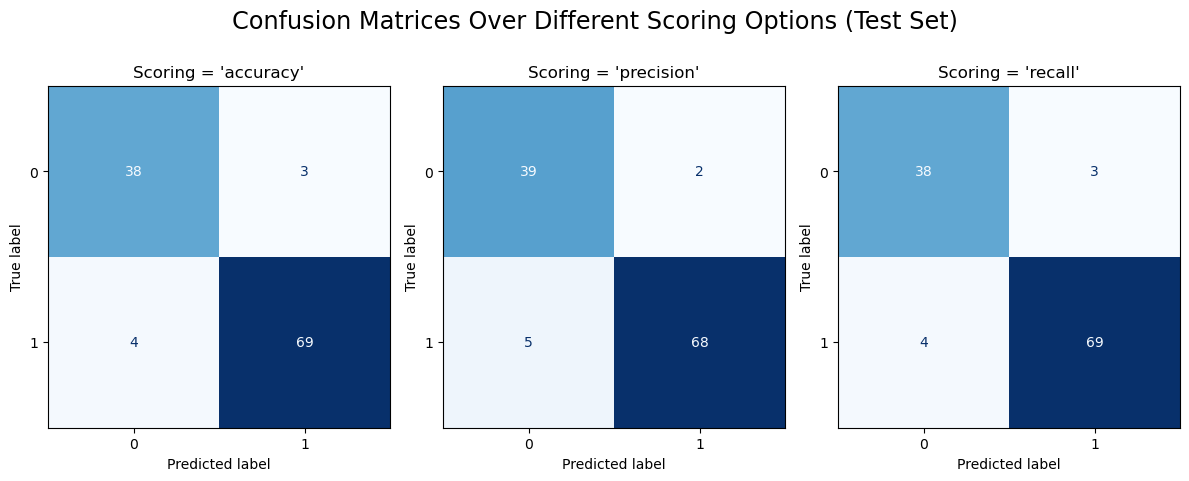

In [194]:
# plot confusion matrices
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 6))
disp = ConfusionMatrixDisplay(
    confusion_matrix=test_cm1, display_labels=[0, 1])
disp.plot(ax=ax1, cmap='Blues', colorbar=False)
ax1.set_title("Scoring = 'accuracy'")

disp = ConfusionMatrixDisplay(
    confusion_matrix=test_cm2, display_labels=[0, 1])
disp.plot(ax=ax2, cmap='Blues', colorbar=False)
ax2.set_title("Scoring = 'precision'")

disp = ConfusionMatrixDisplay(
    confusion_matrix=test_cm3, display_labels=[0, 1])
disp.plot(ax=ax3, cmap='Blues', colorbar=False)
ax3.set_title("Scoring = 'recall'")

fig.suptitle('Confusion Matrices Over Different Scoring Options (Test Set)',
             fontsize='xx-large', y=0.88)
save_fig('d14')
plt.show()

## D15

In [195]:
# model with fine-tuned hyperparameters based on accuracy (the one obtained in D12)
tree_clf = DecisionTreeClassifier(
    random_state=5508, max_depth=2, min_samples_leaf=5, min_samples_split=2)
tree_clf.fit(X_train, y_train)
feature_importances = tree_clf.feature_importances_

combined = list(zip(X_train.columns, feature_importances))
sorted_combined = sorted(combined, key=lambda x: x[1], reverse=True)
sorted_features = [item[0] for item in sorted_combined]
sorted_combined

[('worst area', 0.8446435336528209),
 ('worst concave points', 0.13484051619187723),
 ('mean smoothness', 0.020515950155301933),
 ('area error', 0.0),
 ('compactness error', 0.0),
 ('concave points error', 0.0),
 ('concavity error', 0.0),
 ('fractal dimension error', 0.0),
 ('mean area', 0.0),
 ('mean compactness', 0.0),
 ('mean concave points', 0.0),
 ('mean concavity', 0.0),
 ('mean fractal dimension', 0.0),
 ('mean symmetry', 0.0),
 ('mean texture', 0.0),
 ('perimeter error', 0.0),
 ('smoothness error', 0.0),
 ('symmetry error', 0.0),
 ('texture error', 0.0),
 ('worst compactness', 0.0),
 ('worst concavity', 0.0),
 ('worst fractal dimension', 0.0),
 ('worst smoothness', 0.0),
 ('worst symmetry', 0.0),
 ('worst texture', 0.0)]

## D16

In [196]:
from sklearn.feature_selection import SelectFromModel
selector = SelectFromModel(tree_clf, threshold=0.01)
selector.fit(X_train, y_train)

mask = selector.get_support()
selected_features = list(X_train.columns[mask])
unselected_features = list(X_train.columns[[not x for x in mask]])
print('Retained features: ', selected_features)
print()
print('Removed features: ', unselected_features)

Retained features:  ['mean smoothness', 'worst area', 'worst concave points']

Removed features:  ['area error', 'compactness error', 'concave points error', 'concavity error', 'fractal dimension error', 'mean area', 'mean compactness', 'mean concave points', 'mean concavity', 'mean fractal dimension', 'mean symmetry', 'mean texture', 'perimeter error', 'smoothness error', 'symmetry error', 'texture error', 'worst compactness', 'worst concavity', 'worst fractal dimension', 'worst smoothness', 'worst symmetry', 'worst texture']


In [197]:
feature_dict = dict(sorted_combined)
total_importance = 0
for feature in selected_features:
    total_importance += feature_dict[feature]
print('total feature importance value: ', total_importance)

total feature importance value:  1.0


## D17

In [198]:
reduced_X_train = selector.transform(X_train)
reduced_X_test = selector.transform(X_test)

### with new cv

In [199]:
# params = [{'max_depth': [2, 3, 4, 5],
#            'min_samples_split': [2, 4, 5, 10],
#            'min_samples_leaf': [2, 5]
#            }]

# tree_clf = DecisionTreeClassifier(random_state=5508)
# gs_clf_reduced = GridSearchCV(tree_clf, params, cv=10,
#                               scoring='accuracy', n_jobs=-1, verbose=1)
# gs_clf_reduced.fit(reduced_X_train, y_train)
# print("When scoring='accuracy', the optimal hyperparameters for the reduced training set: ",
#       gs_clf_reduced.best_params_)

# reduced_train_accuracy, reduced_train_precision, reduced_train_recall = dt_evaluate(  # type: ignore
#     gs_clf_reduced, reduced_X_train, y_train)
# reduced_test_accuracy, reduced_test_precision, reduced_test_recall, reduced_test_cm = dt_evaluate(  # type: ignore
#     gs_clf_reduced, reduced_X_test, y_test, get_cm=True)

# rows = ['Train', 'Test']
# columns = ['Accuracy', 'Precision', 'Recall']
# cell_text_reduced = [[reduced_train_accuracy, reduced_train_precision, reduced_train_recall],
#                      [reduced_test_accuracy, reduced_test_precision, reduced_test_recall]]

In [200]:
def plot_2tables(figure_title, figure_name, table_content1, row_labels1, col_labels1, table_content2, row_labels2, col_labels2):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
    ax1.axis('off')
    ax1.axis('tight')
    ax1.margins(x=0, y=0)
    table1 = ax1.table(cellText=table_content1, rowLabels=row_labels1,
                       colLabels=col_labels1, loc='center', cellLoc='center')
    # Adjust font size
    table1.auto_set_font_size(False)
    table1.set_fontsize(13)
    # Adjust cell heights and widths
    table1.scale(0.8, 6)
    ax1.set_title('Using All Features', fontsize=16, y=0.85)

    ax2.axis('off')
    ax2.axis('tight')
    ax2.margins(x=0, y=0)
    table2 = ax2.table(cellText=table_content2, rowLabels=row_labels2,
                       colLabels=col_labels2, loc='center', cellLoc='center')
    # Adjust font size
    table2.auto_set_font_size(False)
    table2.set_fontsize(13)
    # Adjust cell heights and widths
    table2.scale(0.8, 6)
    ax2.set_title('Using Selected Features', fontsize=16, y=0.85)

    fig.suptitle(figure_title, fontsize='xx-large', y=0.95)
    save_fig(figure_name, tight_layout=True,
             bbox_inches='tight', pad_inches=0.05)
    plt.show()

In [201]:
# plot_2tables("Comparing Fine-tuned Decision Trees' Performance", 'd17_tables(new cv)',
#              cell_text_fine_tuned, rows, columns, cell_text_reduced, rows, columns)

In [202]:
# # plot two confusion matrices on the test sets
# fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))


# disp = ConfusionMatrixDisplay(
#     confusion_matrix=test_cm1, display_labels=[0, 1])
# disp.plot(ax=ax1, cmap='Blues', colorbar=False)
# ax1.set_title("Using All Features")

# disp = ConfusionMatrixDisplay(
#     confusion_matrix=reduced_test_cm, display_labels=[0, 1])
# disp.plot(ax=ax2, cmap='Blues', colorbar=False)
# ax2.set_title("Using Selected Features")

# fig.suptitle('Confusion Matrices of Fine-tuned Desicion Trees (Test Set)',
#              fontsize='xx-large', y=1.02)
# save_fig('d17_confusion_matrices(new cv)')
# plt.show()

### without new cv

In [203]:
# model with fine-tuned hyperparameters based on accuracy (the one obtained in D12)
reduced_tree_clf = DecisionTreeClassifier(
    random_state=5508, max_depth=2, min_samples_leaf=5, min_samples_split=2)
reduced_tree_clf.fit(reduced_X_train, y_train)

reduced_train_accuracy, reduced_train_precision, reduced_train_recall = dt_evaluate(  # type: ignore
    reduced_tree_clf, reduced_X_train, y_train)
reduced_test_accuracy, reduced_test_precision, reduced_test_recall, reduced_test_cm = dt_evaluate(  # type: ignore
    reduced_tree_clf, reduced_X_test, y_test, get_cm=True)

rows = ['Train', 'Test']
columns = ['Accuracy', 'Precision', 'Recall']
cell_text_reduced = [[reduced_train_accuracy, reduced_train_precision, reduced_train_recall],
                     [reduced_test_accuracy, reduced_test_precision, reduced_test_recall]]

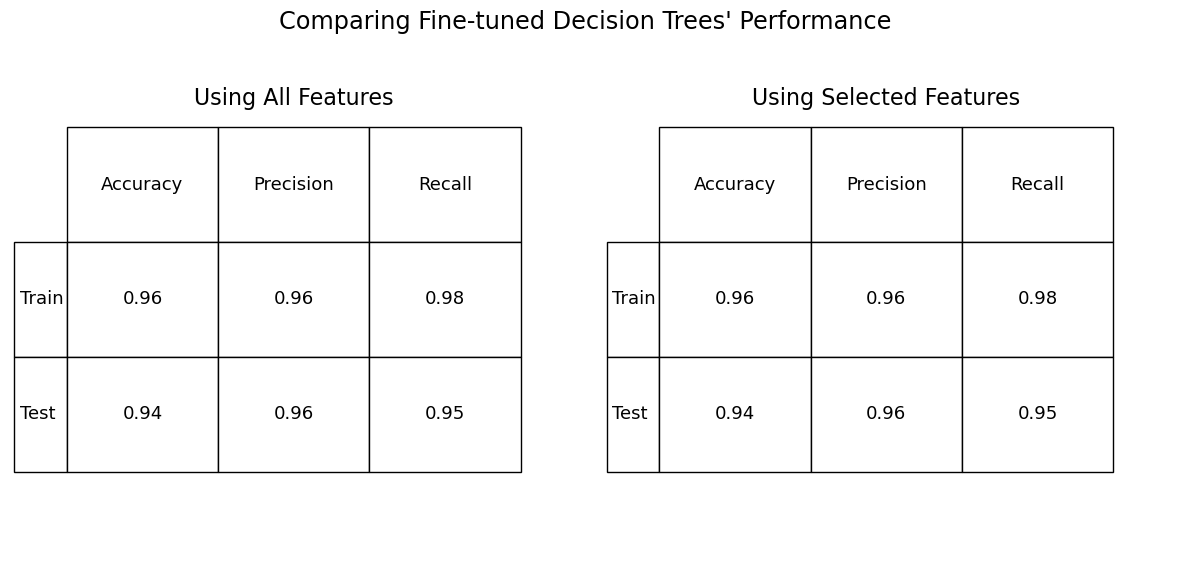

In [204]:
plot_2tables("Comparing Fine-tuned Decision Trees' Performance", 'd17_tables',
             cell_text_fine_tuned, rows, columns, cell_text_reduced, rows, columns)

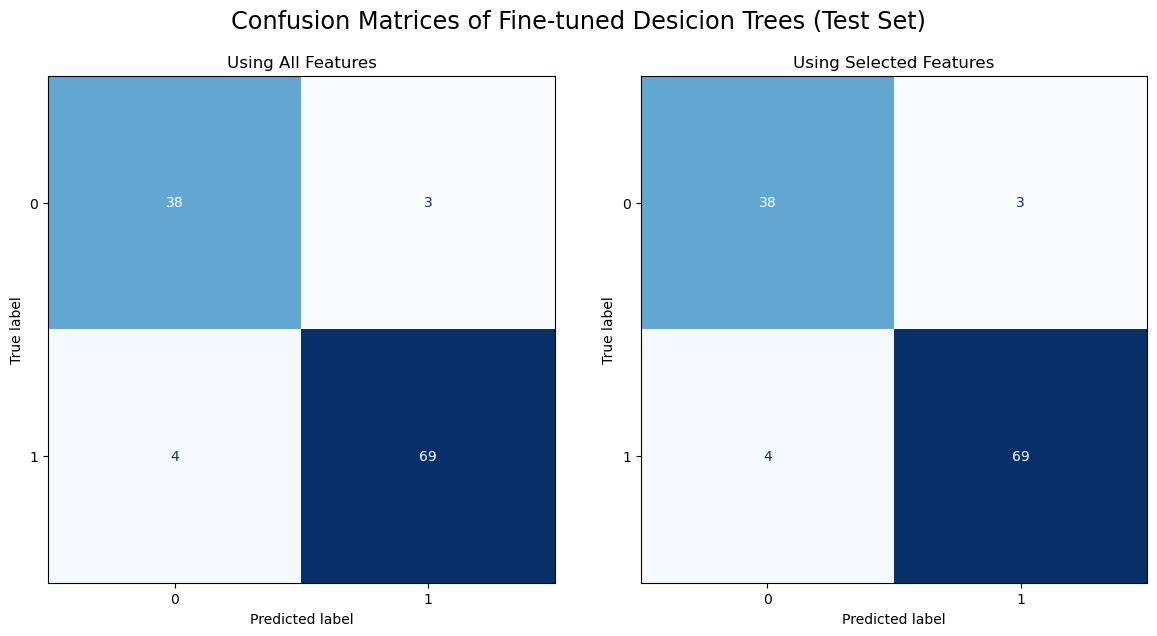

In [205]:
# plot two confusion matrices on the test sets
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))


disp = ConfusionMatrixDisplay(
    confusion_matrix=test_cm1, display_labels=[0, 1])
disp.plot(ax=ax1, cmap='Blues', colorbar=False)
ax1.set_title("Using All Features")

disp = ConfusionMatrixDisplay(
    confusion_matrix=reduced_test_cm, display_labels=[0, 1])
disp.plot(ax=ax2, cmap='Blues', colorbar=False)
ax2.set_title("Using Selected Features")

fig.suptitle('Confusion Matrices of Fine-tuned Desicion Trees (Test Set)',
             fontsize='xx-large', y=1.02)
save_fig('d17_confusion_matrices')
plt.show()

In [ ]:
# https://www.geeksforgeeks.org/feature-selection-using-decision-tree/
# https://www.geeksforgeeks.org/decision-tree-introduction-example/

# Fitting a Random Forest

## D19

In [211]:
from sklearn.ensemble import RandomForestClassifier

rf_params = [{
    'n_estimators': [10, 20, 50, 100, 1000],
    'max_depth': [2, 3, 4, 5]
}]

rf_clf = RandomForestClassifier(random_state=5508)
gs_rf_clf = GridSearchCV(rf_clf, rf_params, cv=10,
                         scoring='accuracy', n_jobs=-1, verbose=1)
gs_rf_clf.fit(X_train, y_train)
print("When scoring='accuracy', the optimal hyperparameters: ",
      gs_rf_clf.best_params_)

rf_train_accuracy, rf_train_precision, rf_train_recall = dt_evaluate(  # type: ignore
    gs_rf_clf, X_train, y_train)
rf_test_accuracy, rf_test_precision, rf_test_recall, rf_test_cm1 = dt_evaluate(  # type: ignore
    gs_rf_clf, X_test, y_test, get_cm=True)

rows = ['Train', 'Test']
columns = ['Accuracy', 'Precision', 'Recall']
cell_text_rf = [[rf_train_accuracy, rf_train_precision, rf_train_recall],
                [rf_test_accuracy, rf_test_precision, rf_test_recall]]
plot_cm_and_table("Random Forest (with the Optimal Hyperparameters, scoring='accuracy')",
                  'd19', rf_test_cm1, cell_text_rf, rows, columns)

Fitting 10 folds for each of 20 candidates, totalling 200 fits
